In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

**Data Collection and Processing**

In [3]:
#load the dataset into a pandas dataframe
data = pd.read_csv('/content/Pandemic.csv')


In [4]:
data.shape

(272, 6)

In [5]:
data.head()

,Unnamed: 0,Epidemics/pandemics,Disease,Death toll,Date,Location
0,0,Black Death,Bubonic plague,75–200 million,1346–1353,"Europe, Asia, and North Africa"
1,1,Spanish flu,Influenza A/H1N1,17–100 million,1918–1920,Worldwide
2,2,Plague of Justinian,Bubonic plague,15–100 million,541–549,"North Africa, Europe and Western Asia"
3,3,HIV/AIDS epidemic,HIV/AIDS,40.1 million (as of 2021,1981–present,Worldwide
4,4,COVID-19 pandemic,COVID-19,7–28.3 million (as of December 2022,2019[c]–present,Worldwide


In [6]:
print("Data Info:")
data.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           272 non-null    int64 
 1   Epidemics/pandemics  272 non-null    object
 2   Disease              272 non-null    object
 3   Death toll           272 non-null    object
 4   Date                 272 non-null    object
 5   Location             272 non-null    object
dtypes: int64(1), object(5)
memory usage: 12.9+ KB


In [7]:
# remove extra  spaces in all columns
data.columns = data.columns.str.strip()

In [8]:
data.columns

Index(['Unnamed: 0', 'Epidemics/pandemics', 'Disease', 'Death toll', 'Date',
       'Location'],
      dtype='object')

In [9]:
data.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
display(data.head())

,ID,Epidemics/pandemics,Disease,Death toll,Date,Location
0,0,Black Death,Bubonic plague,75–200 million,1346–1353,"Europe, Asia, and North Africa"
1,1,Spanish flu,Influenza A/H1N1,17–100 million,1918–1920,Worldwide
2,2,Plague of Justinian,Bubonic plague,15–100 million,541–549,"North Africa, Europe and Western Asia"
3,3,HIV/AIDS epidemic,HIV/AIDS,40.1 million (as of 2021,1981–present,Worldwide
4,4,COVID-19 pandemic,COVID-19,7–28.3 million (as of December 2022,2019[c]–present,Worldwide


In [10]:
# removing the serial number since its coming twice
data = data.drop(columns = 'ID')

In [11]:
data.head()

,Epidemics/pandemics,Disease,Death toll,Date,Location
0,Black Death,Bubonic plague,75–200 million,1346–1353,"Europe, Asia, and North Africa"
1,Spanish flu,Influenza A/H1N1,17–100 million,1918–1920,Worldwide
2,Plague of Justinian,Bubonic plague,15–100 million,541–549,"North Africa, Europe and Western Asia"
3,HIV/AIDS epidemic,HIV/AIDS,40.1 million (as of 2021,1981–present,Worldwide
4,COVID-19 pandemic,COVID-19,7–28.3 million (as of December 2022,2019[c]–present,Worldwide


In [12]:
data.describe()

,Epidemics/pandemics,Disease,Death toll,Date,Location
count,272,272,272,272,272
unique,262,77,202,219,167
top,2009 swine flu pandemic,Bubonic plague,Unknown,2008,Worldwide
freq,2,57,31,6,27


In [22]:
# checking the number of missing values
print(data.isnull().sum())

Epidemics/pandemics     0
Disease                 0
Death toll              0
Date                    0
Location                0
Death toll_numeric     94
dtype: int64


In [ ]:
data["Location"].unique()

In [15]:
data.columns

Index(['Epidemics/pandemics', 'Disease', 'Death toll', 'Date', 'Location'], dtype='object')

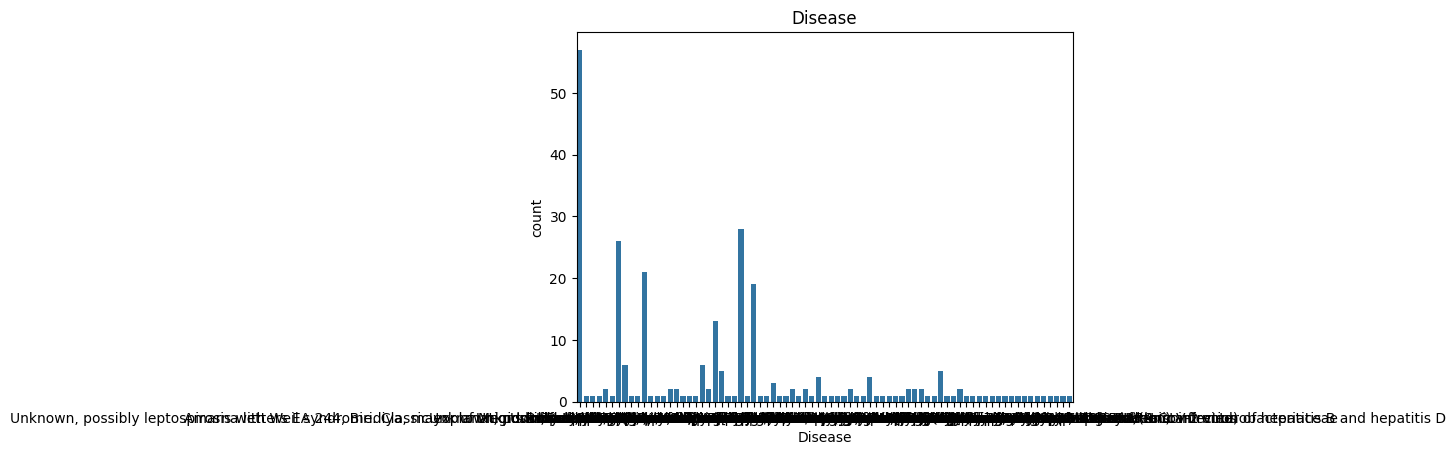

In [16]:
sns.countplot(x='Disease',data=data)
plt.title('Disease')
plt.show()

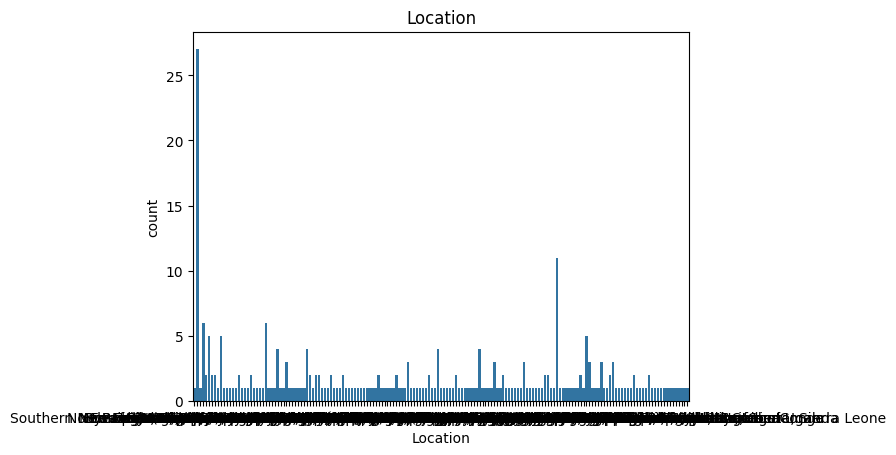

In [17]:
sns.countplot(x='Location',data=data)
plt.title('Location')
plt.show()

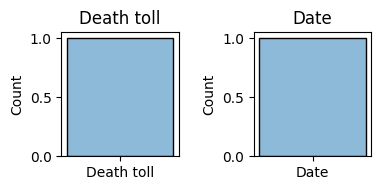

In [18]:
num_cols = ['Death toll', 'Date']
fig, axes = plt.subplots(1, 2, figsize=(4, 2))
for ax, col in zip(axes, num_cols):
    sns.histplot(data=col, kde=True, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

/tmp/ipython-input-258511903.py:5: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


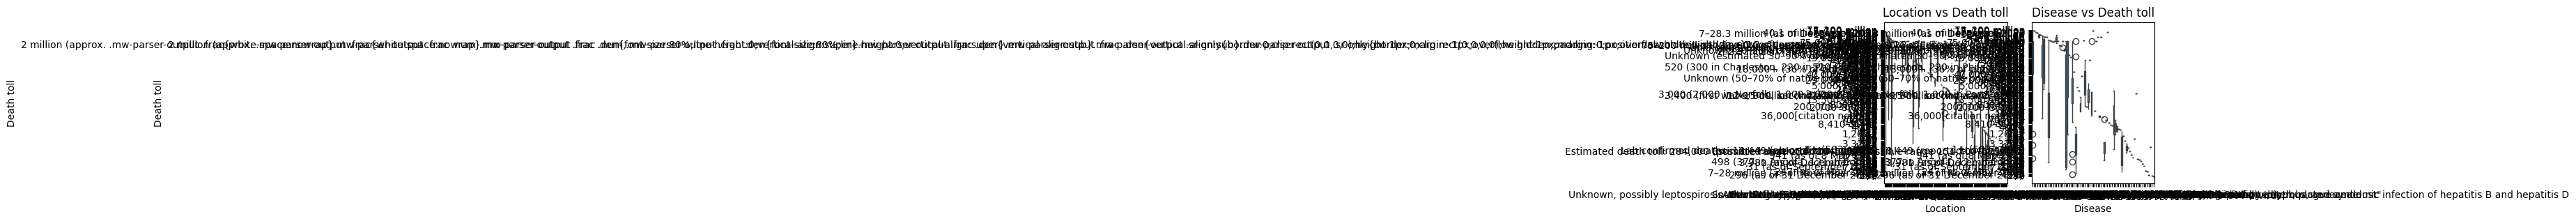

In [19]:
# Bivariate Analysis
fig, axes = plt.subplots(1, 2, figsize=(5, 3))
sns.boxplot(x='Location', y='Death toll', data=data, ax=axes[0]).set_title('Location vs Death toll')
sns.boxplot(x='Disease', y='Death toll', data=data, ax=axes[1]).set_title('Disease vs Death toll')
plt.tight_layout()
plt.show()

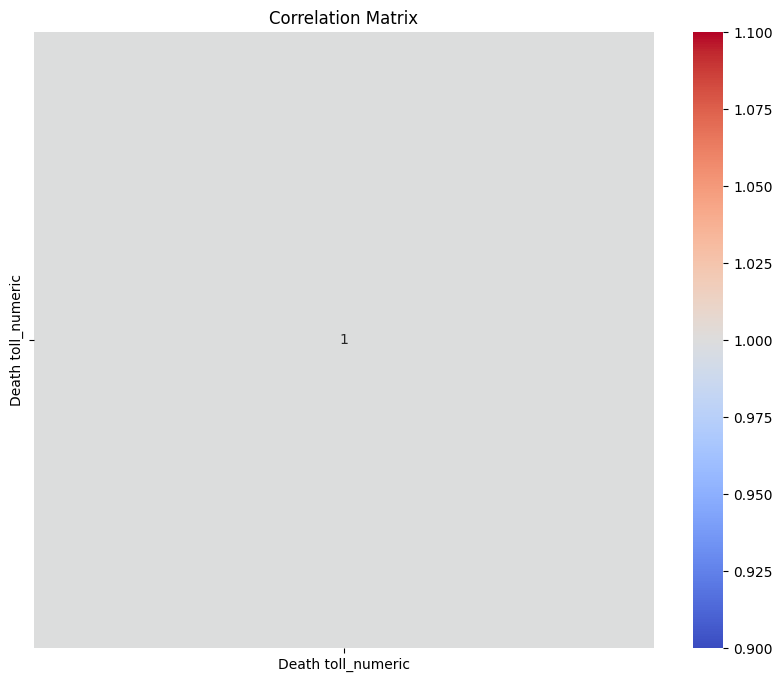

In [21]:
# corelation matrix
# Clean the 'Death toll' column to extract numerical values
def clean_death_toll(death_toll):
    if isinstance(death_toll, str):
        # Remove non-numeric characters and split the range
        numbers = [float(s) for s in death_toll.replace('–', '-').replace(',', '').split('-') if s.strip().isdigit()]
        if numbers:
            # Take the average of the range if multiple numbers are found
            return sum(numbers) / len(numbers)
        else:
            return np.nan  # Return NaN for values that cannot be converted
    return float(death_toll) # Convert numeric values to float

data['Death toll_numeric'] = data['Death toll'].apply(clean_death_toll)

# Now generate the correlation matrix using the cleaned column
num_cols = ['Death toll_numeric'] # Update num_cols to use the cleaned column
plt.figure(figsize=(10, 8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

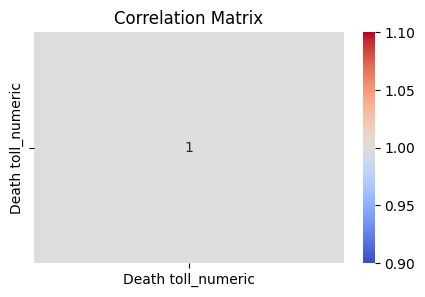

In [25]:
# Correlation matrix
plt.figure(figsize=(5, 3))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()